In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

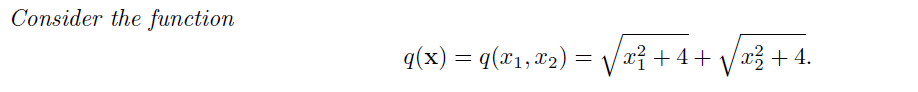

1.) What is the minimizer and minimum function value of q(x) ?, Is the minimizer in unique ?, Is it local or global
minima ?, Is the function q(x) convex ?, explain each of them.

Note that both are sum of positive quantities. The minimizer of the function is (0,0) and the minimum is $\sqrt{0+4} + \sqrt{0+4} = 2+2 = 4$. This minimizer is unique because it achieves the only global minima possible. Function is convex because its hessian is PSD, which will be apparent from calculations below.

$\nabla{q(x)} = <\frac{x_1}{\sqrt{x_1^2 + 4}}, \frac{x_2}{\sqrt{x_2^2 + 4}}>$

$\nabla^2{q(x)}= \begin{bmatrix} \frac{4}{(x_1^2 + 4)^{3/2}} & 0 \\ 0 &  \frac{4}{(x_2^2 + 4)^{3/2}}  \end{bmatrix}$



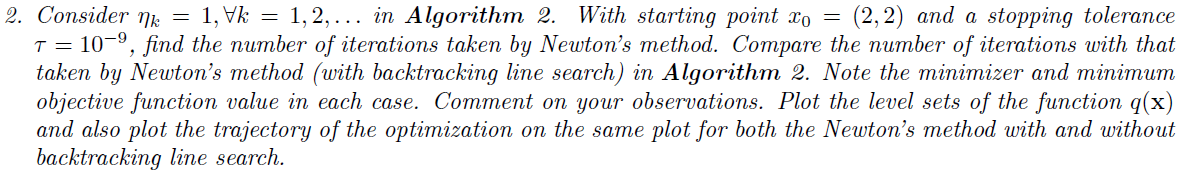

In [40]:
def qx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.sqrt(x1**2 + 4) + np.sqrt(x2**2 + 4)

def gradient_qx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([x1/np.sqrt(x1**2 + 4), x2/np.sqrt(x2**2 + 4)])

def hessian_qx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([[4/(x1**2 + 4)**1.5, 0],[0, 4/(x2**2 + 4)**1.5]])


def dk_qx(xk):
  return np.linalg.inv(hessian_qx(xk))

def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_qx(xk)
  while qx(xk + alpha*pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_qx(xk)
    count += 1
    xks.append(xk)
  return count, xk, qx(xk),xks

def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_qx(xk)
  while qx(xk + alpha*Dk@pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_qx(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*Dk@pk
    pk = -1*gradient_qx(xk)
    xks.append(xk)
    count += 1
  return count, xk, qx(xk), xks


def newton_method(x0, tau, max_iter):
  xk = np.copy(x0)
  count = 0
  pk = gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_qx(xk)
    xk = xk - Dk@pk
    pk = gradient_qx(xk)
    xks.append(xk)
    count += 1
    if count>max_iter:
      break
  return count, xk, qx(xk), xks

In [41]:
#initializations
max_iter = 200
x0 = np.array([2,2])
tau = 1e-9
print("iterations        |final minimizer    | final value   |type    ")
print("---------------------------------------------------------------------------")
count1, final_xk1, final_val1, xks1= newton_method(x0, tau, max_iter)
print(f"{count1}   |{final_xk1}    |{final_val1}     | newton")
print("---------------------------------------------------------------------------")

iterations        |final minimizer    | final value   |type    
---------------------------------------------------------------------------
201   |[-2. -2.]    |5.656854249492381     | newton
---------------------------------------------------------------------------


The values of xk are repeating/oscillating between [2,2] and [-2,-2] this is because eeta we have taken to be 1. I have taken Max Iteration as a stoppage point so that I can store some values.

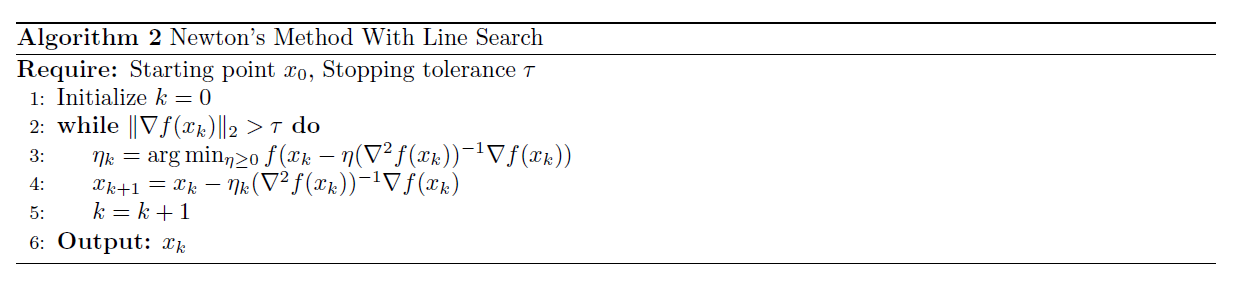

In [42]:
def get_alpha_newton(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_qx(xk)
  while qx(xk + alpha*Dk@pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  xk = np.copy(x0)
  count = 0
  pk = gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_qx(xk)
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk)
    xk = xk - alpha*Dk@pk
    pk = gradient_qx(xk)
    xks.append(xk)
    count += 1
  return count, xk, qx(xk), xks

In [43]:
#initializations
x0 = np.array([2,2])
tau = 1e-9
alpha0 = 1
rho = 0.5
gamma = 0.5
print("iteration |final minimizer    | final value       |type    ")
print("---------------------------------------------------------------------------")
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)
print(f"{count2}   |{final_xk2}    |{final_val2}     | newton with backtracking")
print("---------------------------------------------------------------------------")

iteration |final minimizer    | final value       |type    
---------------------------------------------------------------------------
1   |[0. 0.]    |4.0     | newton with backtracking
---------------------------------------------------------------------------


We directly get to the minimizer with backtracking in newtons method

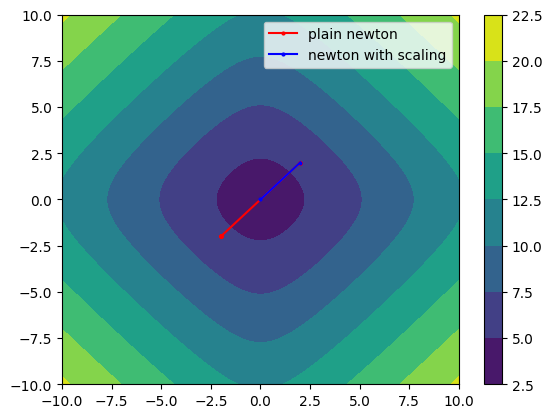

In [44]:
##Plotting Trajectory
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='red', marker = 'o', markersize = 2, label = 'plain newton')
xcordinates2 = [xk1[0] for xk1 in xks2]
ycordinates2 = [xk1[1] for xk1 in xks2]
plt.plot(xcordinates2, ycordinates2, color='blue',  marker = 'o', markersize = 2, label = 'newton with scaling')
plt.legend()
plt.show()

Plain newton will oscillate from (2,2) to (-2,-2) and will have the red trajectory whereas with scaling we converge to the minimum point


In [47]:
def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_qx(xk)
  while qx(xk + alpha*pk) > (qx(xk) + gamma*alpha*gradient_qx(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_qx(xk)
    count += 1
    xks.append(xk)
  return count, xk, qx(xk),xks

|iterations   |final minimizer    | final value   |type    
---------------------------------------------------------------------------
32   |[7.62525638e-10 7.62525638e-10]    |4.0     | gd backtracking without scaling
---------------------------------------------------------------------------


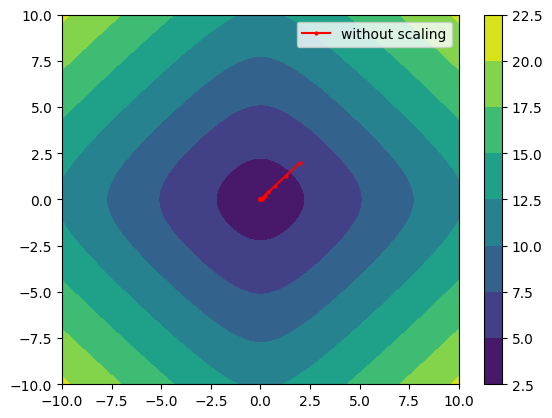

In [50]:
#initializations
x0 = np.array([2,2])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5
print("|iterations   |final minimizer    | final value   |type    ")
print("---------------------------------------------------------------------------")

count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
print(f"{count1}   |{final_xk1}    |{final_val1}     | gd backtracking without scaling")
print("---------------------------------------------------------------------------")


##Plotting Trajectory
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='red', marker = 'o', markersize = 2, label = 'without scaling')
plt.legend()
plt.show()

OBSERVATIONS: using this method we reach the minimum in 32 iterations, minimum and minimizer is (0,0), and 4 as expected. Compared to newton with scaling which takes only 1 iteration to reach the minimum, whereas normal newton took infinite time as it was oscillating

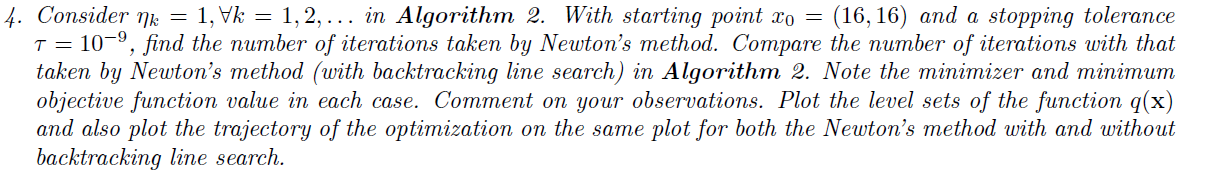

iterations        |final minimizer    | final value   |type    
---------------------------------------------------------------------------
5   |[-5.64802792e+219 -5.64802792e+219]    |inf     | newton
---------------------------------------------------------------------------
16   |[8.34468061e-16 8.34468061e-16]    |4.0     | newton with backtracking
---------------------------------------------------------------------------


<ipython-input-40-2067b9421a30>:9: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x1/np.sqrt(x1**2 + 4), x2/np.sqrt(x2**2 + 4)])
<ipython-input-40-2067b9421a30>:4: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(x1**2 + 4) + np.sqrt(x2**2 + 4)


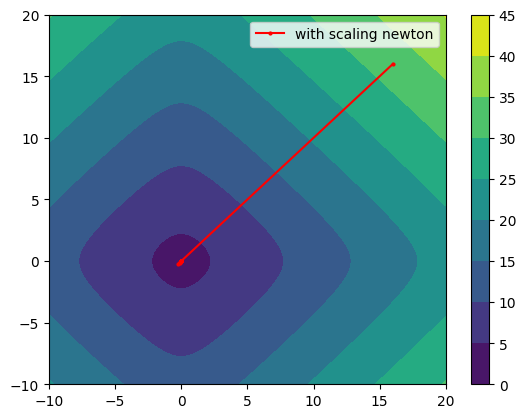

In [57]:

def newton_method(x0, tau, max_iter):
  xk = np.copy(x0)
  count = 0
  pk = gradient_qx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_qx(xk)
    xk = xk - Dk@pk
    pk = gradient_qx(xk)
    xks.append(xk)
    count += 1
    if count>max_iter:
      break
  return count, xk, qx(xk), xks


#initializations
x0 = np.array([16,16])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5

print("iterations        |final minimizer    | final value   |type    ")
print("---------------------------------------------------------------------------")
count1, final_xk1, final_val1, xks1= newton_method(x0, tau, 1e15)
print(f"{count1}   |{final_xk1}    |{final_val1}     | newton")
print("---------------------------------------------------------------------------")
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)
print(f"{count2}   |{final_xk2}    |{final_val2}     | newton with backtracking")
print("---------------------------------------------------------------------------")




##Plotting Trajectory
x = np.linspace(-10, 20, 1000)
y = np.linspace(-10, 20, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
xcordinates2 = [xk2[0] for xk2 in xks2]
ycordinates2 = [xk2[1] for xk2 in xks2]
plt.plot(xcordinates2, ycordinates2, color='red', marker = 'o', markersize = 2, label = 'with scaling newton')
plt.legend()
plt.show()

Normal newton's is going to inf, while backtracking newton is taking 16 iterations to converge to optimal point. I did not plot the normal newton plot and trajectory as it is going to infinity.

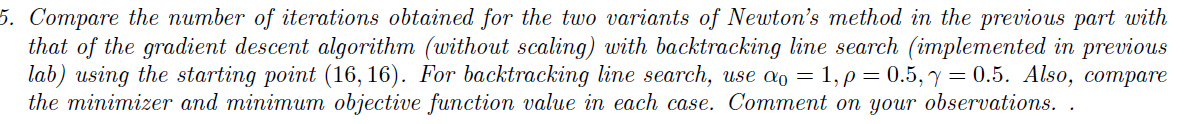

|iterations   |final minimizer    | final value   |type    
---------------------------------------------------------------------------
46   |[1.19947822e-09 1.19947822e-09]    |4.0     | gd backtracking without scaling
---------------------------------------------------------------------------


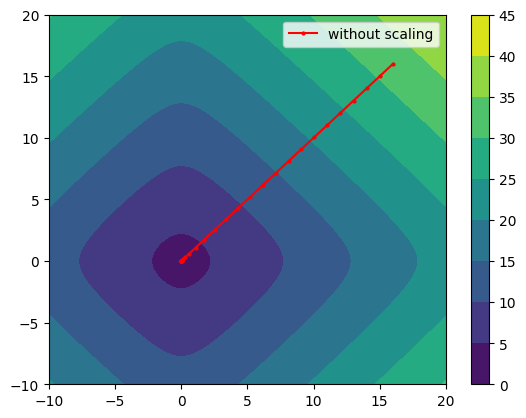

In [59]:
#initializations
x0 = np.array([16,16])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5
print("|iterations   |final minimizer    | final value   |type    ")
print("---------------------------------------------------------------------------")

count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
print(f"{count1}   |{final_xk1}    |{final_val1}     | gd backtracking without scaling")
print("---------------------------------------------------------------------------")


##Plotting Trajectory
x = np.linspace(-10, 20, 1000)
y = np.linspace(-10, 20, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='red', marker = 'o', markersize = 2, label = 'without scaling')
plt.legend()
plt.show()

minimizer is (0,0) and minimum is 4. Without scaling gradient descent backtracking it is taking 46 iterations which is comparable to newtons with scale from previous parts which had 16 iterations to converge. For some problems gradient descent with backtracking (without scaling) performs better than newton's. Newton's work better for problems where the function is quadratic.